# COMP0189: Applied Artificial Intelligence
## Week 3 (Model Selection and Assessment)

### After this week you will be able to ...
- encode categorical values with one-hot encoding
- know which encoding, scaling, and imputing method you should select in accordacne with the dataset characteristics
- impute missing data with KNN
- know how to streamline the preprocessing steps in advanced way (Pipeline and ColmnTransformer)
- perform model selection using different cross-validation methods
- perform model selection and model assessment using different partitions of the data

### Acknowledgements
- https://scikit-learn.org/stable/
- https://archive.ics.uci.edu/ml/datasets/adult

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Encoding and Imputations

### Task 1: Load and Split the Dataset into train and test

In [2]:
# TASK 1: Load Dataset
# We are going to use the same adult dataset as previous week.
# We have cleaned the dataset, but did not touch the missing values.
from sklearn.model_selection import train_test_split
df = pd.read_csv("clean_adult.csv")
df

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
sorted(list(df["Education-num"].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [4]:
df["Sex"].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
# We can see that Education-num is just a ordinary-encoded feature of Education
edu_map = {}
for i, row in df[["Education", "Education-num"]].iterrows():
    education = row["Education"]
    edu_num = row["Education-num"]

    if education not in edu_map:
        edu_map.update({education: edu_num})
    else:
        assert edu_map[education] == edu_num
edu_map

{'Bachelors': 13,
 'HS-grad': 9,
 '11th': 7,
 'Masters': 14,
 '9th': 5,
 'Some-college': 10,
 'Assoc-acdm': 12,
 'Assoc-voc': 11,
 '7th-8th': 4,
 'Doctorate': 16,
 'Prof-school': 15,
 '5th-6th': 3,
 '10th': 6,
 '1st-4th': 2,
 'Preschool': 1,
 '12th': 8}

In [6]:
# let's just drop Education column as we don't need it if we have Education-num
df = df.drop(["Education"], axis=1)
df

,Age,Workclass,Fnlwgt,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Y
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
def train_test_split_df(df, test_ratio=0.1, target_col="Y"):
    df_data = df.drop([target_col], axis=1)
    df_target = df[target_col]

    split_index = int(len(df) * (1 - test_ratio))
    print(f"Splitting from index {split_index}")

    train_X_df = df_data[:split_index]
    test_X_df = df_data[split_index:]
    train_y_df = df_target[:split_index]
    test_y_df = df_target[split_index:]

    train_y_df = np.where(train_y_df == ">50K", 1, 0)
    test_y_df = np.where(test_y_df == ">50K", 1, 0)

    return train_X_df, train_y_df, test_X_df, test_y_df

In [8]:
# Splitting dataset into train and test
train_X_df, train_y_df, test_X_df, test_y_df = train_test_split_df(df)

Splitting from index 29304


In [9]:
# Just for educational purpose:
# For this dataset split, you can see that
# all the unique values of categorical features in test set are subset of that in train set.
# However, we shouldn't expect this, thus need to deal with this situation (dealt in later cells).
for col in train_X_df:
    # Skips for the non-categorical values
    if col in [
        "Age",
        "Fnlwgt",
        "Capital-gain",
        "Capital-loss",
        "Hours-per-week",
    ]:
        continue
    train_uniq_vals = train_X_df[col].unique()
    test_uniq_vals = test_X_df[col].unique()

    if not set(test_uniq_vals).issubset(set(train_uniq_vals)):
        print(col)
        print(set(test_uniq_vals))
        print(set(train_uniq_vals))

### Task 2: Encode categorical variables (label/ordinal encoding & one-hot encoding)

### Important: We need special care when we are encoding categorical variables

**1. Take care of the missing values**
- Beware not to encode missing values unless you are intending to do so.
- Sometimes you want to encode missing values to a separate cateogory. For example, when you want to predict if passengers of titanic had survived or not, missing data of certain features can actually have meaning, i.e., Cabin information can be missing because the body was not found.

**2. Know which encoding and scaling method you should select**
- If your categories are ordinal, then it makes sense to use a LabelEncoder with a MinMaxScaler. For example, you can encode [low, medium, high], as [1,2,3], i.e., distance between low to high is larger than that of medium and high.

- However, if you have non-ordinal categorical values, like [White, Hispanic, Black, Asian], then it would be better to use a OneHotEncoder instead of forcing ordinality with a LabelEncoder. Otherwise the algorithms you use (especially distance based algorithms like KNN) will make the assumption that the distance between White and Asian is larger than White and Hispanic, which is nonsensical.

**3. Split before you encode to avoid data leakage**
- Split the dataset before you encode your data. It is natural for algorithms to see unknown values in the validation/test set that was not appearing in the train set. `sklearn.preprocessing.OneHotEncoder` is good at handling these unknown categories (`handle_unknown` parameter).

- Discussion: What if you are certain about all the possible categories that can appear for each feature? Can you encode all the values before splitting the dataset into train and test set?


This notebook shows the three points in the following sections with examples.

### Task 2-1: Label Encoding (with missing values)

In [10]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

label_encoder = LabelEncoder()

In [11]:
train_X_df.isnull().sum()

Age                  0
Workclass         1638
Fnlwgt               0
Education-num        0
Marital-status       0
Occupation        1643
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     525
dtype: int64

In [12]:
mask_df = train_X_df.isnull()
# We will encode these columns with LabelEncoder, and the rest with OneHotEncoder
categ = ["Sex"]
train_X_df[categ] = train_X_df[categ].apply(label_encoder.fit_transform)
# This masking process won't give any effect in this cell, where 'SEX' and 'Y' don't have any missing values.
# However, if the columns we are encoding have missing values,
# this is how you avoid encoding missing values as a separate category.
# To see the effect of masking, add 'Workclass' in the categ variable and check df.isnull().sum().
train_X_df = train_X_df.mask(mask_df, np.nan)
train_X_df

,Age,Workclass,Fnlwgt,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29299,39,Self-emp-not-inc,148443,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,60,United-States
29300,23,Private,91733,13,Never-married,Tech-support,Own-child,White,0,3325,0,40,United-States
29301,39,Private,176634,12,Never-married,Tech-support,Not-in-family,White,0,0,0,40,United-States
29302,40,Local-gov,74949,10,Never-married,Exec-managerial,Not-in-family,White,1,0,0,40,United-States


In [13]:
# The missing values are intact and were not encoded.
train_X_df.isnull().sum()

Age                  0
Workclass         1638
Fnlwgt               0
Education-num        0
Marital-status       0
Occupation        1643
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     525
dtype: int64

In [14]:
train_X_df["Race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

### Task 2-2: One Hot Encoding (with missing values imputation)

Tip 1: Impute the missing values (choose the right strategy) before doing OHE  
Tip 2: Try creating a separate dataframe with one-hot encoded columns and combine the dataframe with the original dataframe for the final one.

In [15]:
# Let's first impute the missing values.
# Since it's a categorical value, we don't use KNN or mean imputation.
# We will replace with the most frequent value.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
imputed_train_X = imputer.fit_transform(train_X_df)
imputed_train_X_df = pd.DataFrame(imputed_train_X, columns=train_X_df.columns)

# Check that we have no missing values now
imputed_train_X_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
dtype: int64

In [16]:
# We want to turn these features into one-hot vectors
onehot_categ = [
    "Workclass",
    "Marital-status",
    "Occupation",
    "Relationship",
    "Race",
    "Native-country",
]
onehot_encoder = OneHotEncoder(sparse_output=False).fit(
    imputed_train_X_df[onehot_categ]
)
encoded = onehot_encoder.transform(imputed_train_X_df[onehot_categ])
encoded_df = pd.DataFrame(encoded, columns=onehot_encoder.get_feature_names_out())
encoded_df

,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Marital-status_Divorced,Marital-status_Married-AF-spouse,...,Native-country_Portugal,Native-country_Puerto-Rico,Native-country_Scotland,Native-country_South,Native-country_Taiwan,Native-country_Thailand,Native-country_Trinadad&Tobago,Native-country_United-States,Native-country_Vietnam,Native-country_Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29299,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29300,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29301,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29302,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
# After finishing encoding categorical variables,
# we make the final dataframe by concatenating it with the imputed dataframe
imputed_train_X_df = imputed_train_X_df.drop(onehot_categ, axis=1)
final_df_train_X_df = pd.concat([imputed_train_X_df, encoded_df], axis=1)
final_df_train_X_df

,Age,Fnlwgt,Education-num,Sex,Capital-gain,Capital-loss,Hours-per-week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,...,Native-country_Portugal,Native-country_Puerto-Rico,Native-country_Scotland,Native-country_South,Native-country_Taiwan,Native-country_Thailand,Native-country_Trinadad&Tobago,Native-country_United-States,Native-country_Vietnam,Native-country_Yugoslavia
0,39,77516,13,1,2174,0,40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,1,0,0,13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,1,0,0,40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,1,0,0,40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,0,40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29299,39,148443,9,1,0,0,60,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29300,23,91733,13,0,3325,0,40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29301,39,176634,12,0,0,0,40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29302,40,74949,10,1,0,0,40,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
final_df_train_X_df.shape

(29304, 88)

### Side Note: Data Imputation with KNN
For the adult dataset, missing data present only in categorical values, so imputing strategy that makes floating point may not make sense.
However, for continuous values, you can use various imputation strategies, such as taking simple mean or mean value from K nearest neighbors (KNN).
If you use `sklearn.imput.KNNImputer`, each sample’s missing values are imputed using the `mean` value from `n_neighbors` nearest neighbors found in the training set.
If you want to use `mode` value from neighbors (for categorical data imputation) you need to implement the imputer by yourself.

- `sklearn-pandas` package (https://pypi.org/project/sklearn-pandas/1.5.0/) provides `CategoricalImputer` class, which is suitable for such processing

Here, we use iris dataset to show how to use KNNImputer for continuous values

In [19]:
from sklearn.datasets import load_iris
from sklearn.impute import KNNImputer

In [20]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [21]:
# Applying a random mask to make missing data
mask = np.random.choice([True, False], size=iris_df.shape[0] * iris_df.shape[1])
mask[:500] = True
np.random.shuffle(mask)
mask = np.reshape(mask, iris_df.shape)
iris_df = iris_df.mask(~mask)

iris_df.isnull().sum()

sepal length (cm)     6
sepal width (cm)      5
petal length (cm)    10
petal width (cm)     12
dtype: int64

In [22]:
train_X, test_X = iris_df[:100], iris_df[100:]

In [23]:
# It is important to impute the train and test set separately (not fitting KNN to test set) to avoid data leak.
imputer = KNNImputer(n_neighbors=5)
imputed_train_X = imputer.fit_transform(train_X)
imputed_test_X = imputer.transform(test_X)

In [24]:
del iris, iris_df, mask, train_X, test_X, imputer, imputed_train_X, imputed_test_X

### Task 3: Create different preprocessing strategies of your own
Create different versions of X (X1 and X2) by dropping missing values (X1) or using strategies for data imputation (X2). Define different preprocessing strategies using the `Pipeline` and `ColmnTransformer` class


### Task 3-1: Dropping missing values (X1)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
non_categorical_features = [
    "Age",
    "Fnlwgt",
    "Capital-gain",
    "Capital-loss",
    "Hours-per-week",
]
categorical_ohe_features = [
    "Workclass",
    "Education-num",
    "Marital-status",
    "Occupation",
    "Relationship",
    "Race",
    "Native-country",
]
categorical_le_features = ["Sex"]

In [26]:
# Your explorations here

In [27]:
# X1
df = pd.read_csv("clean_adult.csv")
df = df.drop(["Education"], axis=1)
df_dropna = df.dropna()
train_X1, train_y1, test_X1, test_y1 = train_test_split_df(df_dropna)


Splitting from index 27145


In [28]:
# For features like 'Age' and 'Fnlwgt'
non_categorical_transformer = Pipeline(
    # For KNNImputer, see the side note below
    # We can add scaling for non-categorical features
    steps=[("scaling", StandardScaler())]
)

# For features like 'Workclass' and 'Education'
categorical_ohe_transformer = Pipeline(
    steps=[
        ("OHE", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
        # no need to scale
    ]
)

# For features like 'Sex'
categorical_le_transformer = Pipeline(
    steps=[
        # Here, we change to the OrdinalEncoder as LabelEncoder is used for the target variable
        # Try changing the OrdinalEncoder to LabelEncoder to see what error you see,
        # and check the documentation of LabelEncoder
        ("LE", OrdinalEncoder()),
        # In the case of adult dataset, no need to scale for just 'Sex' variable,
        # but other label/ordinal encoded categorical features can be ordinal -> scaling
        ("scaling", StandardScaler()),
    ]
)

In [29]:
ct1 = ColumnTransformer(
    transformers=[
        ("non-categorical", non_categorical_transformer, non_categorical_features),
        ("categorical-ohe", categorical_ohe_transformer, categorical_ohe_features),
        ("categorical-le", categorical_le_transformer, categorical_le_features),
    ]
)

In [30]:
#X1
transformed_train_X1 = ct1.fit_transform(train_X1, train_y1)
transformed_test_X1 = ct1.transform(test_X1)
transformed_train_X1.shape, train_y1.shape, transformed_test_X1.shape, test_y1.shape

((27145, 102), (27145,), (3017, 102), (3017,))

#### Task 3-1: Using strategies for data imputation (X2)

In [31]:
# Reload the dataset,
df = pd.read_csv("clean_adult.csv")
df = df.drop(["Education"], axis=1)
train_X2, train_y2, test_X2, test_y2 = train_test_split_df(df)

Splitting from index 29304


In [32]:
# For features like 'Age' and 'Fnlwgt'
non_categorical_transformer = Pipeline(
    # For KNNImputer, see the side note below
    # We can add scaling for non-categorical features
    steps=[("KNNImputer", KNNImputer(n_neighbors=5)), ("scaling", StandardScaler())]
)

# For features like 'Workclass' and 'Education'
categorical_ohe_transformer = Pipeline(
    steps=[
        ("SimpleImputer", SimpleImputer(strategy="most_frequent")),
        ("OHE", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
        # no need to scale
    ]
)

# For features like 'Sex'
categorical_le_transformer = Pipeline(
    steps=[
        ("ModeImputer", SimpleImputer(strategy="most_frequent")),
        # Here, we change to the OrdinalEncoder as LabelEncoder is used for the target variable
        # Try changing the OrdinalEncoder to LabelEncoder to see what error you see,
        # and check the documentation of LabelEncoder
        ("LE", OrdinalEncoder()),
        # In the case of adult dataset, no need to scale for just 'Sex' variable,
        # but other label/ordinal encoded categorical features can be ordinal -> scaling
        ("scaling", StandardScaler()),
    ]
)

In [33]:
ct2 = ColumnTransformer(
    transformers=[
        ("non-categorical", non_categorical_transformer, non_categorical_features),
        ("categorical-ohe", categorical_ohe_transformer, categorical_ohe_features),
        ("categorical-le", categorical_le_transformer, categorical_le_features),
    ]
)

In [34]:
#X2
transformed_train_X2 = ct2.fit_transform(train_X2, train_y2)
transformed_test_X2 = ct2.transform(test_X2)
transformed_train_X2.shape, train_y2.shape, transformed_test_X2.shape, test_y2.shape

((29304, 103), (29304,), (3257, 103), (3257,))

### Task 4:
Train different models (KNN, SVM) to predict the y from the two versions of X (X1 and X2) with a fixed value of the regularization parameter.
Centre and scale the data before training the models. Create tables or plots to show how accuracy varies for different imputation strategies or different models.

### Task 4-1: Training KNN and SVM Models with X1



In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif

In [36]:
model_knn = KNeighborsClassifier()

model_knn.fit(transformed_train_X1, train_y1)

# Predict Output
y_hat_knn = model_knn.predict(transformed_test_X1)
accuracy_score(y_hat_knn, test_y1)

0.8223400729201193

In [37]:
model_svm = svm.SVC(kernel="rbf")  # Linear Kernel
model_svm.fit(transformed_train_X1, train_y1)

# Predict Output
y_hat_svm = model_svm.predict(transformed_test_X1)
accuracy_score(y_hat_svm, test_y1)

0.8498508452104739

In [38]:
model_svm.dual_coef_


array([[-0.32491347, -0.02922315, -1.        , ...,  1.        ,
         1.        ,  1.        ]])

### Task 4-2: Training KNN and SVM Models with X2

In [39]:
model_knn = KNeighborsClassifier()

model_knn.fit(transformed_train_X2, train_y2)

# Predict Output
y_hat_knn = model_knn.predict(transformed_test_X2)
accuracy_score(y_hat_knn, test_y2)

0.8268345102855389

In [40]:
model_svm = svm.SVC(kernel="linear")  # Linear Kernel
model_svm.fit(transformed_train_X2, train_y2)

# Predict Output
y_hat_svm = model_svm.predict(transformed_test_X2)
accuracy_score(y_hat_svm, test_y2)

0.8470985569542524

## Part 2: Cross Validation (CV)

scikit-learn provides a nice visualisation of various cross validation methods.
This notebook focuses on different cross validation strategies and how to account for data structure during cross-validation.


Visit: https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#visualizing-cross-validation-behavior-in-scikit-learn

![kfold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_006.png)
![stra-kfold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_003.png)
![group-kfold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_004.png)
![stra-group-kfold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_010.png)

In [41]:
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    GroupKFold,
    StratifiedGroupKFold,
    GridSearchCV,
)

### Task 5
Now apply cross-validation to the train set (k=5) for optimizing the models hyperparameters. After identifying the best hyperparameter, measure the performance on the test data by training the models on the training data using the optimal hyperparameter. Note: remember that the pre-processing steps, including data centering and scaling should be embedded in the CV.


In [42]:
# The solution only using X1 data
model_knn = KNeighborsClassifier()
k_range = np.arange(1, 10)
        # define grid search
grid = dict(n_neighbors=k_range)
cv = KFold(n_splits=5)
grid_search = GridSearchCV(
        estimator=model_knn,
        param_grid=grid,
        pre_dispatch = 6,
        n_jobs=6,
        cv=cv,
        scoring="accuracy",
        error_score=0,
        verbose=1,
        )
grid_result = grid_search.fit(transformed_train_X1, train_y1)



Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [43]:
# model_svm = svm.SVC(kernel="linear")
# C_list = [0.1, 0.5, 1, 5]
#         # define grid search
# grid = dict(C=C_list)
# cv = KFold(n_splits=5)
# grid_search = GridSearchCV(
#         estimator=model_svm,
#         param_grid=grid,
#         pre_dispatch = 16,
#         n_jobs=4,
#         cv=cv,
#         scoring="accuracy",
#         error_score=0,
#         verbose=1,
#         )
# grid_result = grid_search.fit(transformed_train_X1, train_y1)
# model_svm = svm.SVC(kernel="linear",C=grid_result.best_params_["C"])
# model_svm.fit(transformed_train_X1, train_y1)
# y_hat_svm = model_svm.predict(transformed_test_X1)
# print(grid_result.cv_results_['mean_test_score'])
# print(grid_result.cv_results_['std_test_score'])
# print(accuracy_score(y_hat_svm, test_y1))



#### Task 5-1
Plot the model performance (mean accuracy and SD) for different hyper-parameter values.
- How does the accuracy vary as function of the hyperparameter?


Text(0, 0.5, 'mean accuracy')

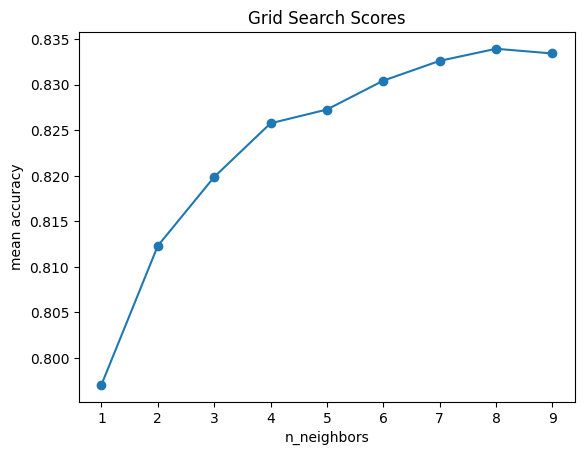

In [44]:
scores_mean = grid_result.cv_results_['mean_test_score']


_, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
# for idx, val in enumerate(k_range):
ax.plot(k_range, scores_mean, '-o')

# ax.tick_params(axis='x', rotation=rot)
ax.set_title('Grid Search Scores')
ax.set_xlabel("n_neighbors")
ax.set_ylabel('mean accuracy')
# ax.legend(loc='best')
  # ax.grid('on')

Text(0, 0.5, 'SD')

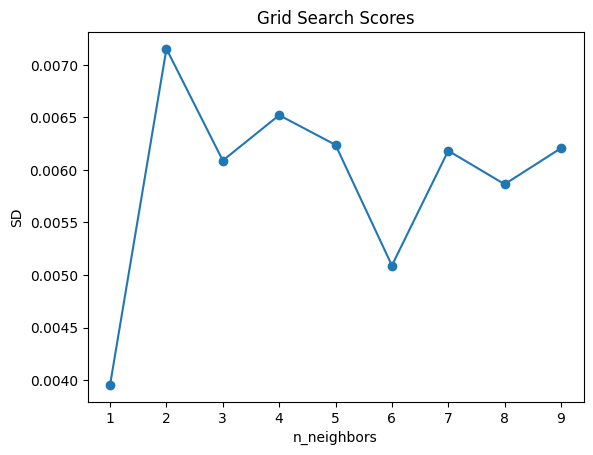

In [45]:
scores_mean = grid_result.cv_results_['std_test_score']


_, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
# for idx, val in enumerate(k_range):
ax.plot(k_range, scores_mean, '-o')

# ax.tick_params(axis='x', rotation=rot)
ax.set_title('Grid Search Scores')
ax.set_xlabel("n_neighbors")
ax.set_ylabel('SD')
# ax.legend(loc='best')
  # ax.grid('on')

#### Task 5-2
Print the average cross-validation score, the best cross-validation score, the best hyperparameter and the test-score.
 - Is there a difference between the average cross-validation score, the best cross-validation score and the test-score?



In [46]:
# The solution only on KNN model with X1 data
model_knn = KNeighborsClassifier(n_neighbors = grid_result.best_params_["n_neighbors"])
model_knn.fit(transformed_train_X1, train_y1)
y_hat_knn = model_knn.predict(transformed_test_X1)
print("average cross-validation score: ",grid_result.cv_results_['mean_test_score'].mean())
print("best cross-validation score: ", grid_result.cv_results_['mean_test_score'].max())
print("the best hyperparameter: ",grid_result.best_params_)
print("the test score on test set: ",accuracy_score(y_hat_knn, test_y1))

average cross-validation score:  0.8236221117046315
best cross-validation score:  0.8339289003499722
the best hyperparameter:  {'n_neighbors': 8}
the test score on test set:  0.8302949950281737


### Task 6
Repeat task 5 using stratified CV with k=5. Centre and scale the data before training the models. Print the average cross-validation score, the best cross-validation score, the best hyperparameter and the test-score.

- Did the performances changes with the stratified CV?


In [47]:
# The solution only shows the StratifiedKFold cv on KNN model with X1 data
model_knn = KNeighborsClassifier()
k_range = np.arange(1, 10)
# define grid search
grid = dict(n_neighbors=k_range)
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(
        estimator=model_knn,
        param_grid=grid,
        pre_dispatch = 6,
        n_jobs=6,
        cv=cv,
        scoring="accuracy",
        error_score=0,
        verbose=1,
        )
grid_result = grid_search.fit(transformed_train_X1,train_y1)
# print(grid_result.cv_results_['mean_test_score'])
model_knn = KNeighborsClassifier(n_neighbors = grid_result.best_params_["n_neighbors"])
model_knn.fit(transformed_train_X1, train_y1)
y_hat_knn = model_knn.predict(transformed_test_X1)
print("average cross-validation score: ",grid_result.cv_results_['mean_test_score'].mean())
print("best cross-validation score: ", grid_result.cv_results_['mean_test_score'].max())
print("the best hyperparameter: ",grid_result.best_params_)
print("the test score on test set: ",accuracy_score(y_hat_knn, test_y1))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
average cross-validation score:  0.8237039765866438
best cross-validation score:  0.8340025787437835
the best hyperparameter:  {'n_neighbors': 8}
the test score on test set:  0.8302949950281737


### Task 7
Repeat task 5 using stratified group CV considering 'Race' as a group with k=5. Centre and scale the data before training the models. Print the average cross-validation score, the best cross-validation score, the best hyperparameter and the test-score.
 - Did the performances changes with the stratified group CV?

In [48]:
# The solution only shows the stratified group CV cv on KNN model with X1 data
model_knn = KNeighborsClassifier()
k_range = np.arange(1, 10)
# define grid search
grid = dict(n_neighbors=k_range)
cv = StratifiedGroupKFold(n_splits=5)
grid_search = GridSearchCV(
        estimator=model_knn,
        param_grid=grid,
        pre_dispatch = 6,
        n_jobs=6,
        cv=cv,
        scoring="accuracy",
        error_score=0,
        verbose=1,
        )
grid_result = grid_search.fit(transformed_train_X1, train_y1,groups=train_X1["Race"])
model_knn = KNeighborsClassifier(n_neighbors = grid_result.best_params_["n_neighbors"])
model_knn.fit(transformed_train_X1, train_y1)


y_hat_knn = model_knn.predict(transformed_test_X1)
print("average cross-validation score: ",grid_result.cv_results_['mean_test_score'].mean())
print("best cross-validation score: ", grid_result.cv_results_['mean_test_score'].max())
print("the best hyperparameter: ",grid_result.best_params_)
print("the test score on test set: ",accuracy_score(y_hat_knn, test_y1))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
average cross-validation score:  0.855398542396931
best cross-validation score:  0.8640174303369177
the best hyperparameter:  {'n_neighbors': 9}
the test score on test set:  0.8269804441498178


### Task 8
Now implement a nested CV for optimize the models’ hyper-parameters and assessing the models’ performance (with k=5 for the inner and outer loop). The inner loop should optimize the models’ hyper-parameters and the outer loop should assess the models’ performance.

In [49]:
inner_cv = KFold(n_splits=5)
outer_cv = KFold(n_splits=5)


In [50]:
#reload X1
df = pd.read_csv("clean_adult.csv")
df = df.drop(["Education"], axis=1)
df_dropna = df.dropna()

In [51]:
score = []
model_knn = KNeighborsClassifier()
k_range = np.arange(1, 10)
# define grid search
grid = dict(n_neighbors=k_range)
for i, (train_index, test_index) in enumerate(outer_cv.split(df_dropna)):
  train_data = df_dropna.iloc[train_index].drop(["Y"], axis=1)
  test_data = df_dropna.iloc[test_index].drop(["Y"], axis=1)
  train_data_y = np.where(df_dropna.iloc[train_index]["Y"] == ">50K", 1, 0)
  test_data_y = np.where(df_dropna.iloc[test_index]["Y"] == ">50K", 1, 0)
  transformed_train_tem = ct1.fit_transform(train_data, train_data_y)
  transformed_test_tem = ct1.transform(test_data)
  grid_search = GridSearchCV(
        estimator=model_knn,
        param_grid=grid,
        pre_dispatch = 6,
        n_jobs=6,
        cv=inner_cv,
        scoring="accuracy",
        error_score=0,
        verbose=1,
        )
  grid_result = grid_search.fit(transformed_train_tem, train_data_y)
  model_knn = KNeighborsClassifier(n_neighbors = grid_result.best_params_["n_neighbors"])
  model_knn.fit(transformed_train_tem, train_data_y)
  y_hat_knn = model_knn.predict(transformed_test_tem)
  score.append(accuracy_score(y_hat_knn, test_data_y))






Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [52]:
print("average nested cross-validation score: ",np.mean(score))

average nested cross-validation score:  0.8336981647358626
